In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
URL = "C:\\Users\\HP\Downloads\\Jan-24 project - Jan-24 project.csv"
data = pd.read_csv(URL)
data.head()

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,availability_status,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,In Stock,7,Spring,Yes,0.658145,Individual,Female
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",In Stock,54,Winter,No,4.734585,Bundle,Female
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",In Stock,31,Winter,No,2.024140,Bundle,Female
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,In Stock,49,Spring,No,3.869239,Individual,Other
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,In Stock,74,Winter,Yes,0.812489,Individual,Male


In [6]:
data[(data['product_subcategory'] != "Eggs, Meat & Fish") & (data['product_subcategory'] != "Fruits & Vegetables")]['product_subcategory'].unique()

array(['Hair Care', 'Storage & Accessories', 'Pooja Needs',
       'Bins & Bathroom Ware', 'Bath & Hand Wash', 'All Purpose Cleaners',
       'Skin Care', 'Mops, Brushes & Scrubs', 'Cooking & Baking Needs',
       'Chocolates & Biscuits', 'Fresheners & Repellents',
       'Snacks, Dry Fruits, Nuts', 'Dairy & Cheese',
       'Pasta, Soup & Noodles', 'Dry Fruits', 'Drinks & Beverages',
       'Kitchen Accessories', 'Flask & Casserole', 'Breakfast Cereals',
       'Frozen Veggies & Snacks', 'Fruit Juices & Drinks',
       'Cookies, Rusk & Khari', 'Fragrances & Deos', 'Tea',
       'Masalas & Spices', "Men's Grooming", 'Chocolates & Candies',
       'Steel Utensils', 'Tinned & Processed Food', 'Organic Staples',
       'Sauces, Spreads & Dips', 'Pickles & Chutney',
       'Ready To Cook & Eat', 'Baby Bath & Hygiene', 'Stationery',
       'Pet Food & Accessories', 'Biscuits & Cookies', 'Oral Care',
       'Snacks & Namkeen', 'Detergents & Dishwash', 'Crockery & Cutlery',
       'Cuts & Spro

In [4]:
data["category"].unique()

array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

In [3]:
# descriptive stats for numerical columns
data.describe()

,product_id,selling_price,original_price,product_rating,customer_reviews_count,shipping_weight
count,27555.00000,27555.000000,27555.000000,18929.000000,27555.000000,27555.000000
mean,13778.00000,322.514808,382.056664,3.943410,49.962874,2.742169
std,7954.58767,486.263116,581.730717,0.739063,29.015473,1.298855
min,1.00000,2.450000,3.000000,1.000000,0.000000,0.500019
25%,6889.50000,95.000000,100.000000,3.700000,25.000000,1.622361
50%,13778.00000,190.000000,220.000000,4.100000,50.000000,2.731724
75%,20666.50000,359.000000,425.000000,4.300000,75.000000,3.871023
max,27555.00000,12500.000000,12500.000000,5.000000,100.000000,4.999455


In [3]:
data.isnull().sum()

product_id                   0
product_title                1
category                     0
product_subcategory          0
brand                        1
selling_price                0
original_price               0
product_type                 0
product_rating            8626
product_description        115
availability_status          0
customer_reviews_count       0
seasonal_indicator           0
promotion_indicator          0
shipping_weight              0
bundle_indicator             0
customer_demographics        0
dtype: int64

In [4]:
data.dropna(axis=0, how='any', subset=["product_title", "brand"], inplace=True)

In [6]:
# CHECK/IMPUTE NULL VALUES

#FRUITS&VEGEIES AND EGGS,MEAT,FISH CATEGORIES HAS NO RATING

categories = data["category"].unique()

# data['product_rating'].fillna(data.groupby("category")['product_rating'].transform("mean"), inplace=True)
# data[np.isnan(data["product_rating"])].fillna(data.groupby("category")['product_rating'].transform("mean"), inplace=True)

category_rating = {}

for i in categories:
    category_rating[i] = data[data["category"] == i]["product_rating"].mean()
    
# category_rating
for key,val in category_rating.items():
#     print(key,val)
    data.loc[data["category"] == key, "product_rating"] = data.loc[data["category"] == key, "product_rating"].fillna(value=val)
    

    

# not imputing/adding missing product description

In [7]:
data.isna().sum()

product_id                  0
product_title               0
category                    0
product_subcategory         0
brand                       0
selling_price               0
original_price              0
product_type                0
product_rating            907
product_description       114
availability_status         0
customer_reviews_count      0
seasonal_indicator          0
promotion_indicator         0
shipping_weight             0
bundle_indicator            0
customer_demographics       0
dtype: int64

In [5]:
# Drop avaiability status column because it has only 1 indicator
data.drop(['availability_status'], axis=1, inplace=True)

In [9]:
data["product_title"].value_counts()
# products with reapeating product title

Turmeric Powder/Arisina Pudi                            26
Extra Virgin Olive Oil                                  15
Cow Ghee/Tuppa                                          14
Colorsilk Hair Colour With Keratin                      12
Olive Oil - Extra Virgin                                12
                                                        ..
Cereal - Reeses Puffs                                    1
Pickle - Green Chilli (Sliced) With out Garlic           1
Sesame Hot Sauce                                         1
Chai / Coffee/ Tea-Milk Mug - Floral Print, BB 335 1     1
Prunes - Pitted, Dried Plum                              1
Name: product_title, Length: 23539, dtype: int64

In [10]:
# number of unique categories
len(data["category"].unique())

11

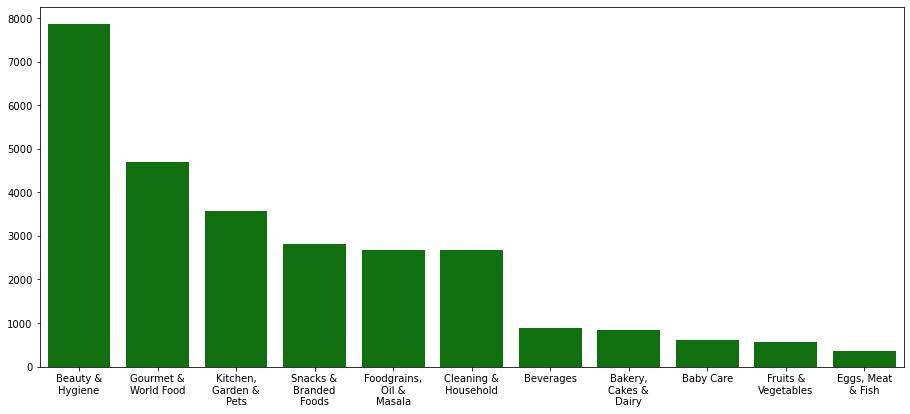

In [11]:
# CATEGORIES WITH HIGHEST NUMBER OF ITEMS
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])

sns.barplot(x=data["category"].value_counts().index, y=data["category"].value_counts().values, color='green')
wrap_labels(ax, 10)

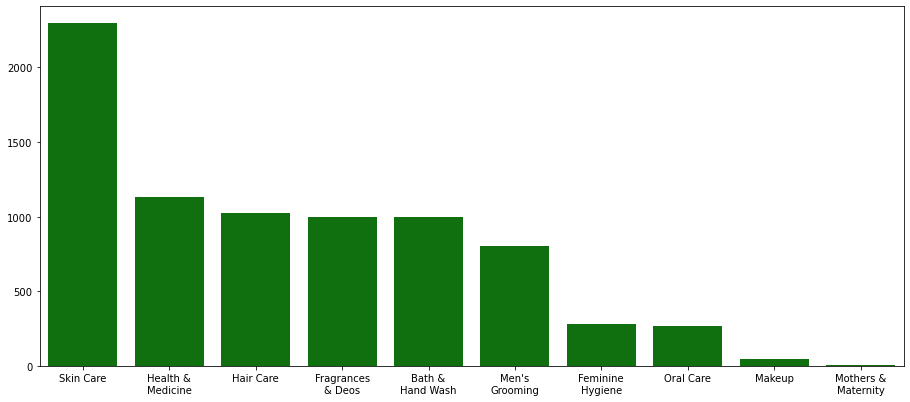

In [12]:
# SKIN CARE HAS HIGHEST ITEMS IN BEAUTY & HYGIENE CATEGORY

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])

sns.barplot(x=data[(data["category"] == "Beauty & Hygiene")]["product_subcategory"].value_counts().index, y=data[(data["category"] == "Beauty & Hygiene")]["product_subcategory"].value_counts().values, color='green')
wrap_labels(ax, 10)

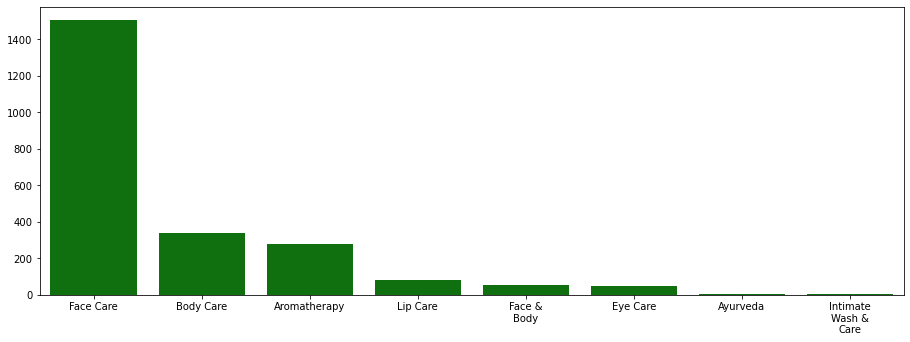

In [13]:

fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(x=data[(data["category"] == "Beauty & Hygiene") & (data["product_subcategory"] == "Skin Care")]["product_type"].value_counts().index, y=data[(data["category"] == "Beauty & Hygiene") & (data["product_subcategory"] == "Skin Care")]["product_type"].value_counts().values, color='green')
wrap_labels(ax, 10)

In [14]:
data["product_type"].value_counts()

Face Care                1508
Ayurveda                  538
Men's Deodorants          500
Shampoo & Conditioner     461
Containers Sets           415
                         ... 
Turkey & Duck               1
Specialty                   1
Marinated Meat              1
Prawns & Shrimps            1
Organic Eggs                1
Name: product_type, Length: 426, dtype: int64

In [15]:
data["discount_percent"] = ((data["original_price"] - data["selling_price"])/data["original_price"])*100
# ADDING DISCOUNT PERCENT FOR EACH PRODUCT

In [16]:
data["discount_percent"].describe()

count    27553.000000
mean        11.825114
std         14.624789
min          0.000000
25%          0.000000
50%          5.000000
75%         20.000000
max         83.666667
Name: discount_percent, dtype: float64

In [17]:
data[data["discount_percent"] > 80]

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_percent
10438,10439,NHS 860 Temperature Control Professional Hair ...,Beauty & Hygiene,Hair Care,Nova,467.03,2395.0,Tools & Accessories,3.2,This Selfie Hair Straightener from Nova gives ...,10,Summer,Yes,2.478091,Bundle,Male,80.499791
13318,13319,Small Silicone Spatula With Plastic Handle - A...,"Kitchen, Garden & Pets",Bakeware,HAZEL,75.00,399.0,Baking Tools & Brushes,3.9,"This silicone spatula is safety-tested, heat r...",5,Spring,Yes,2.063675,Individual,Other,81.203008
13740,13741,Decorative Party Light Big Star String LED Lig...,"Kitchen, Garden & Pets",Appliances & Electricals,Lexton,209.00,1099.0,CFL & Led Bulbs,3.2,Bring home these bright and festive lights fro...,22,Summer,Yes,2.827309,Bundle,Other,80.982712
17713,17714,Fruit & Vegetables Hand Juicer,"Kitchen, Garden & Pets",Kitchen Accessories,Triones,349.00,1995.0,Kitchen Tools & Other Accessories,1.9,Hand juicer for fruits and vegetables in steel...,9,Winter,No,0.722251,Bundle,Female,82.506266
26976,26977,Curry Leaves,Fruits & Vegetables,Herbs & Seasonings,Fresho,2.45,15.0,Indian & Exotic Herbs,NaN,"With dark green and glossy appearance, curry l...",60,Autumn,Yes,4.555567,Bundle,Male,83.666667


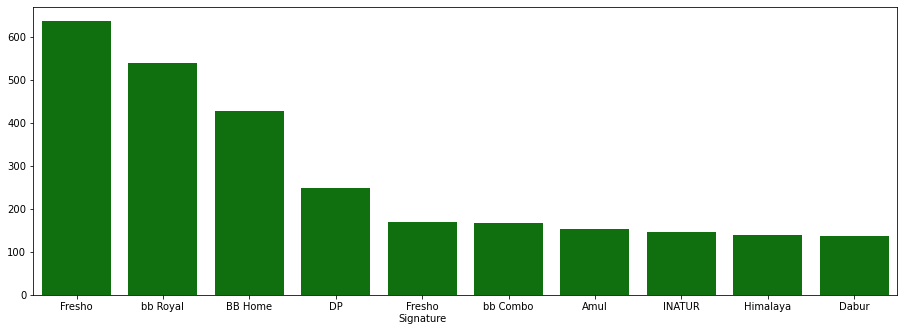

In [18]:
data["brand"].value_counts() # BRANDS WITH MOST PRODUCTS


fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(x=data["brand"].value_counts()[:10].index, y=data["brand"].value_counts()[:10].values, color='green')
wrap_labels(ax, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x12f3c006310>,
 'caps': [<matplotlib.lines.Line2D at 0x12f3c0069d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12f3bd86f70>,
 'medians': [<matplotlib.lines.Line2D at 0x12f3c0130d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12f3c013430>,
 'means': []}

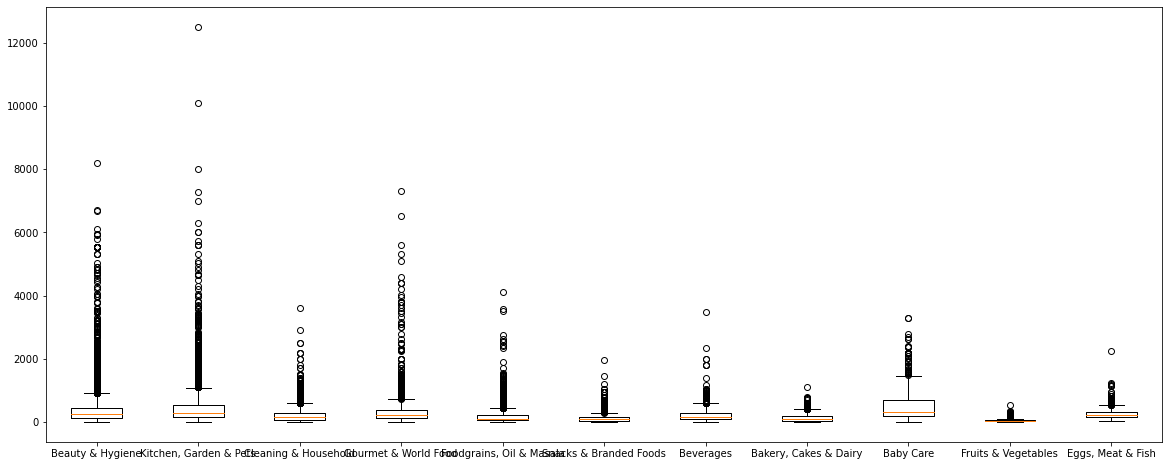

In [19]:
# sale price range of the products


mydict = {}
for i in categories:
    mydict[i] = data[data["category"]==i]["selling_price"].values

plt.figure(figsize=(20,8))
plt.boxplot(mydict.values(), labels=mydict.keys())
# sns.boxplot(data=mydict, y=mydict.values(), x=mydict.keys())


In [20]:
# AVERAGE SALE PRICE OF EACH CATEGORY, BOXPLOT

In [21]:
# BRANDS AND RATING
data["brand"].unique()

array(['Sri Sri Ayurveda', 'Mastercook', 'Trm', ..., 'Solo', '365',
       'Baron De Bercy'], dtype=object)

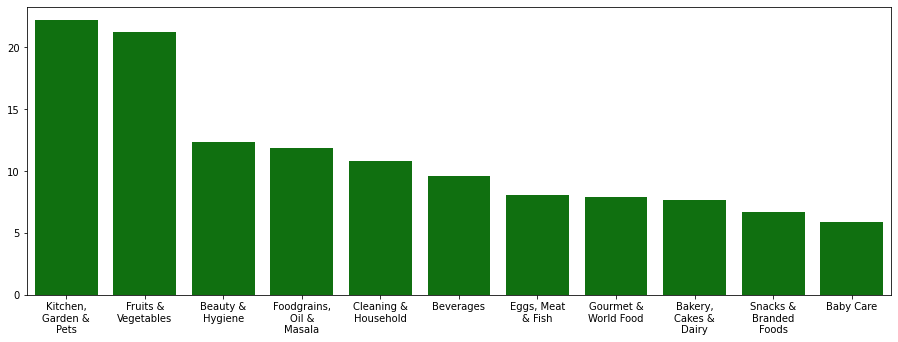

In [22]:
# CATEGORY WISE AVERAGE DISCOUNT
avg_discount_category = {}
for i in categories:
    avg_discount_category[i] = data[data["category"] == i]["discount_percent"].mean()
    
avg_discount_category = dict(sorted(avg_discount_category.items(), key=lambda item: item[1], reverse=True))
# avg_discount_category    

fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(x=list(avg_discount_category.keys()), y=list(avg_discount_category.values()), color='green')
wrap_labels(ax, 10)

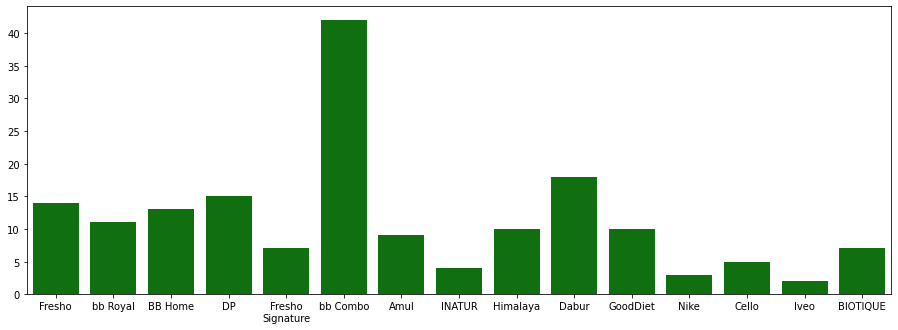

In [41]:
# BRANDS WITH HIGHEST NUMBER OF TYPES OF PRODUCTS/CATEGORY


# HOW MANY DIFFERENT SUBCATEGORIES ARE BRANDS WITH MOST ITEMS IN CATALOG IN? 

brands = data["brand"].value_counts().index
x = []
for i in brands:
    x.append(len(data[data["brand"]==i]["product_subcategory"].unique()))
    
# print(x)
             
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
# print(x)
sns.barplot(x=brands[:15], y=x[:15], color='green')
wrap_labels(ax, 10)

In [24]:
data[np.isnan(data["product_rating"])]

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_percent
89,90,Sweet Corn Kernels - Chipotle,Fruits & Vegetables,Cuts & Sprouts,Supa Corn,55.0,55.00,Cut & Peeled Veggies,NaN,"Ready To Eat Sweet Corn kernels, packaged usin...",50,Autumn,Yes,2.360580,Bundle,Female,0.000000
115,116,Sapota - Organically Grown,Fruits & Vegetables,Fresh Fruits,Fresho,35.0,43.75,Organic Fruits,NaN,Brown skinned sapotas are smooth to grainy tex...,61,Spring,No,1.577635,Bundle,Male,20.000000
122,123,Cabbage - Red,Fruits & Vegetables,Fresh Vegetables,Fresho,23.0,28.75,Cabbage & Cauliflower,NaN,"It is round, wrapped in purplish red leaf laye...",60,Summer,Yes,1.637142,Individual,Other,20.000000
131,132,Banana - Red,Fruits & Vegetables,Fresh Fruits,Fresho,39.0,48.75,"Banana, Sapota & Papaya",NaN,Standing apart from the common varieties of ye...,17,Summer,Yes,1.369676,Individual,Male,20.000000
132,133,"Chilli - Bajji, Mild",Fruits & Vegetables,Herbs & Seasonings,Fresho,14.0,17.50,"Lemon, Ginger & Garlic",NaN,Fresho is our brand of fresh fruits and vegeta...,38,Autumn,No,2.907636,Individual,Female,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27377,27378,Fried Rice Mix,Fruits & Vegetables,Cuts & Sprouts,Fresho,45.0,56.25,Recipe Packs,NaN,"This pack of cut Beans, Carrots, Sweetcorn, Ba...",93,Summer,Yes,1.297032,Individual,Other,20.000000
27466,27467,Chicken Seekh Kabab Punjabi,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Fresho,223.0,290.00,Chicken Sausages,NaN,"Prepared in the traditional style, the kebabs ...",9,Summer,No,4.701727,Bundle,Other,23.103448
27469,27470,Canned Skipjack Light Meat Tuna - Flakes In Brine,"Eggs, Meat & Fish",Fish & Seafood,Golden Prize,149.0,149.00,Canned Seafood,NaN,"Premium Quality Fish, Imported from Thailand, ...",4,Autumn,No,1.980123,Bundle,Other,0.000000
27487,27488,Broad Beans - Diced,Fruits & Vegetables,Fresh Vegetables,Fresho,33.0,41.25,Cut & Peeled Veggies,NaN,Fresh broad beans have a delicious earthy flav...,27,Winter,Yes,2.757371,Individual,Other,20.000000


In [25]:
highrated = data[data["product_rating"] > 4]
highrated[highrated["discount_percent"] > 0]
# HIGHLY RATED PRODUCTS AND PERCENT DISCOUNT
# TOP DISCOUNTS

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_percent
16,17,Smooth Skin Oil - For Dry Skin,Beauty & Hygiene,Skin Care,Aroma Treasures,324.00,360.0,Aromatherapy,5.0,"Specially crafted for dry skin, this richly fo...",31,Winter,Yes,3.688933,Bundle,Other,10.000000
20,21,Ceramic Barrel Brush - Colour May Vary,Beauty & Hygiene,Hair Care,Bronson Professional,525.00,700.0,Tools & Accessories,4.2,This Ceramic Barrel Brush by Bronson Professio...,79,Winter,No,4.768823,Individual,Other,25.000000
21,22,Instant Noodles - Chicken Satay Flavor,Gourmet & World Food,"Pasta, Soup & Noodles",Koka,45.00,50.0,Imported Noodles,4.1,Koka Instant noodles are known for their caref...,73,Autumn,No,3.214027,Individual,Other,10.000000
28,29,Paratha Puff,Snacks & Branded Foods,Frozen Veggies & Snacks,Switz,90.00,110.0,Frozen Veg Snacks,4.3,Switz Puff Parathas are made with the highest ...,9,Winter,Yes,1.664881,Bundle,Other,18.181818
31,32,Chocobakes Choc Filled Cookies,"Bakery, Cakes & Dairy","Cookies, Rusk & Khari",Cadbury,102.00,120.0,"Bakery Biscuits, Cookies",4.2,Experience new exciting chocolatey centre fill...,70,Winter,No,1.793219,Bundle,Female,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27542,27543,Embellish Skin Lightening Serum,Beauty & Hygiene,Skin Care,Organic Harvest,1525.75,1795.0,Face Care,4.2,Achieve an everlasting illuminated skin by inc...,56,Spring,No,2.334109,Bundle,Female,15.000000
27543,27544,Popcorn - French Butter & Pink Salt,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",4700BC,31.50,35.0,Gourmet Popcorn,4.1,High-quality mushroom corn popped in olive oil...,30,Summer,Yes,4.217474,Individual,Other,10.000000
27546,27547,Organic Powder - Garam Masala,"Foodgrains, Oil & Masala",Organic Staples,Organic Tattva,152.00,160.0,Organic Masalas & Spices,4.2,Organic Tattva Garam masala is a famous spice ...,91,Winter,Yes,1.575774,Individual,Male,5.000000
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",7,Summer,No,4.540101,Individual,Other,20.000000
